# Desafío - Boosting Classifiers (Sebastián Rebolledo)

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import lec7_graphs as afx
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### Ejercicio 1: Preprocesamiento

In [2]:
df=pd.read_csv('churn_train.csv').drop('Unnamed: 0', axis=1)

In [3]:
df.sample()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
2955,WV,62,area_code_408,no,no,0,128.7,111,21.88,169.5,104,14.41,193.6,97,8.71,10.3,5,2.78,1,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   object 
 1   account_length                 3333 non-null   int64  
 2   area_code                      3333 non-null   object 
 3   international_plan             3333 non-null   object 
 4   voice_mail_plan                3333 non-null   object 
 5   number_vmail_messages          3333 non-null   int64  
 6   total_day_minutes              3333 non-null   float64
 7   total_day_calls                3333 non-null   int64  
 8   total_day_charge               3333 non-null   float64
 9   total_eve_minutes              3333 non-null   float64
 10  total_eve_calls                3333 non-null   int64  
 11  total_eve_charge               3333 non-null   float64
 12  total_night_minutes            3333 non-null   f

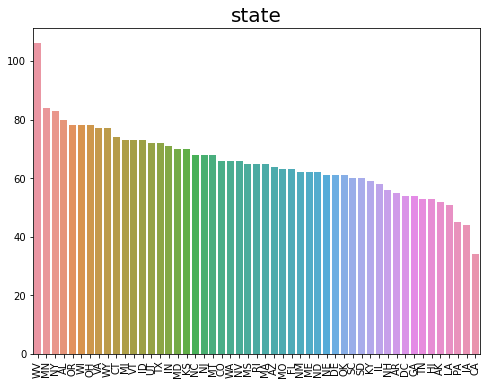

<Figure size 576x432 with 0 Axes>

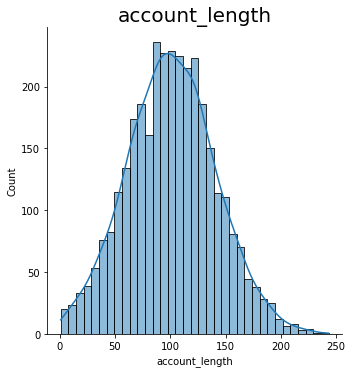

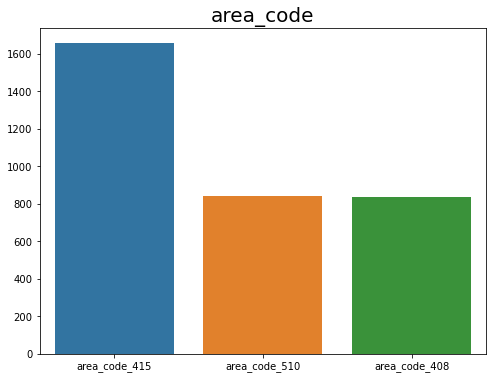

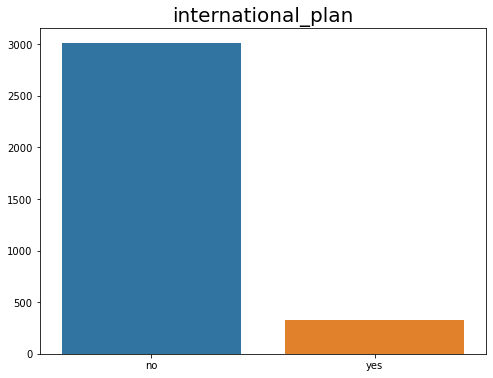

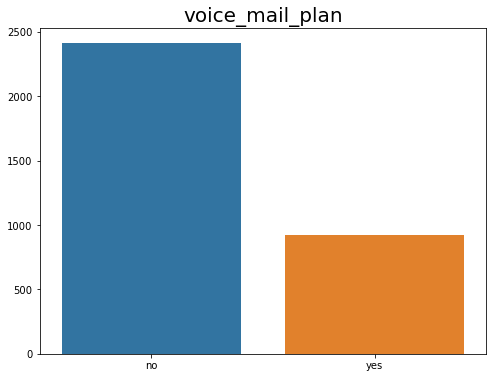

<Figure size 576x432 with 0 Axes>

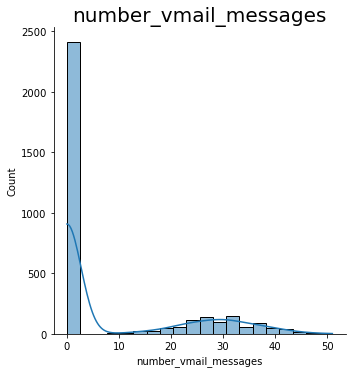

<Figure size 576x432 with 0 Axes>

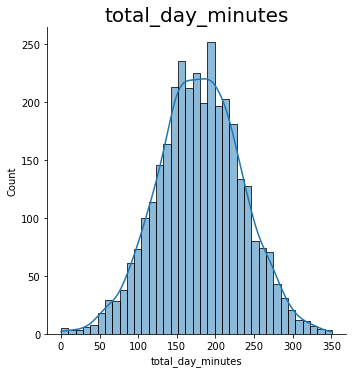

<Figure size 576x432 with 0 Axes>

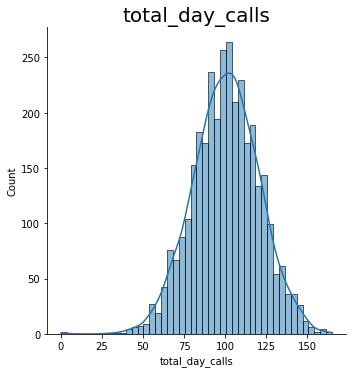

<Figure size 576x432 with 0 Axes>

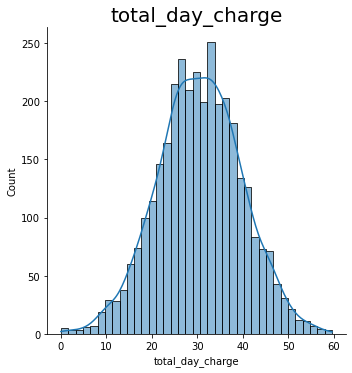

<Figure size 576x432 with 0 Axes>

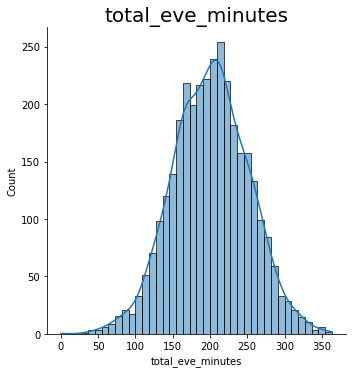

<Figure size 576x432 with 0 Axes>

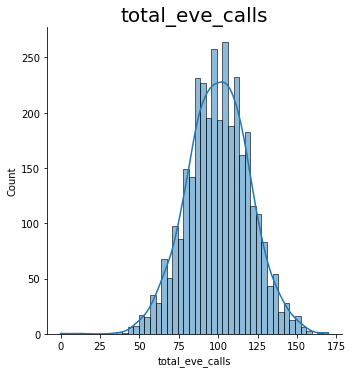

<Figure size 576x432 with 0 Axes>

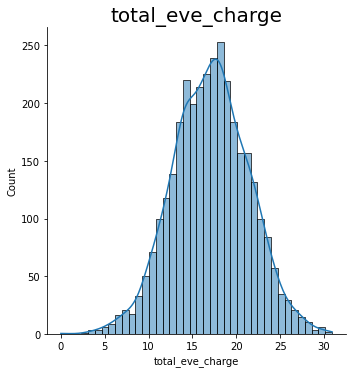

<Figure size 576x432 with 0 Axes>

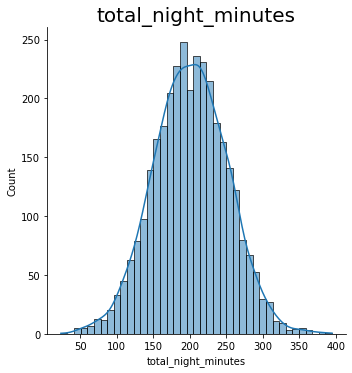

<Figure size 576x432 with 0 Axes>

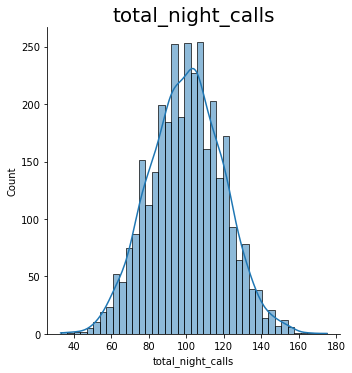

<Figure size 576x432 with 0 Axes>

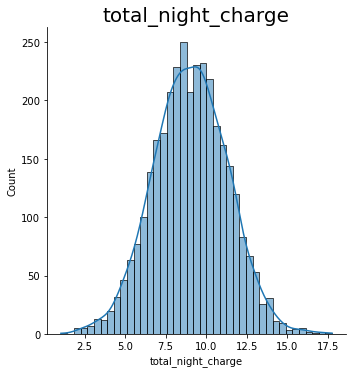

<Figure size 576x432 with 0 Axes>

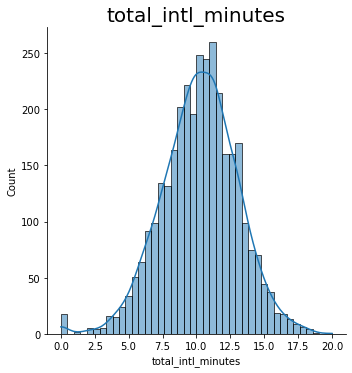

<Figure size 576x432 with 0 Axes>

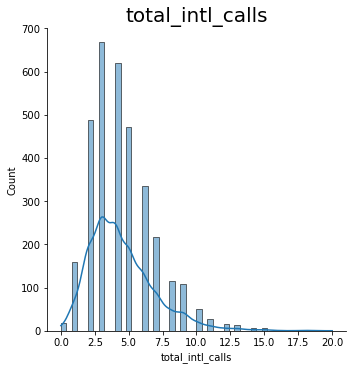

<Figure size 576x432 with 0 Axes>

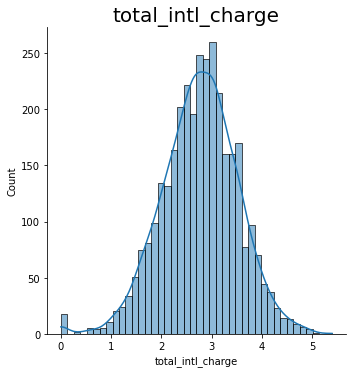

<Figure size 576x432 with 0 Axes>

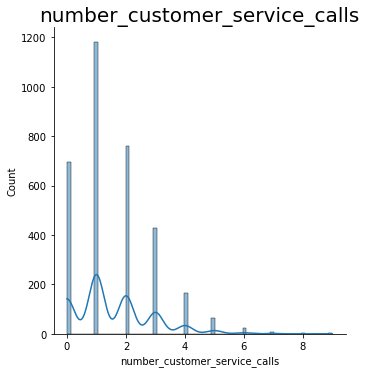

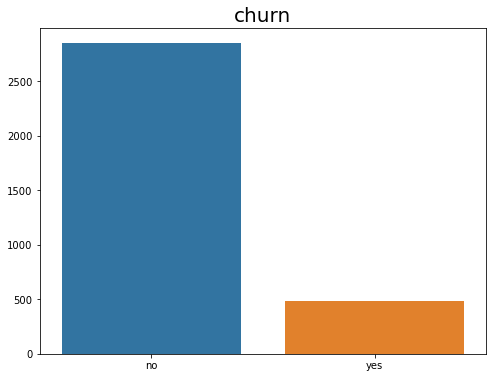

In [5]:
for columns in df.columns:
    plt.figure(figsize=(8,6))
    if df[columns].dtype == 'object':
        sns.barplot(x=df[columns].value_counts().index, y=df[columns].value_counts().values)
        if columns == 'state':
            plt.xticks(rotation = 90)
        
    else:
        sns.displot(df[columns],kde=True)
    plt.title(columns,fontdict={'fontsize':20})    
    plt.show()
    

#### Se observa que las clases dentro del vector objetivo se encuentran bastante desbalanceadas, lo que podria llevar a que el modelo le cueste encontrar la clase 'yes', que es la con menos eventos.

In [6]:
df['churn']=np.where(df['churn']=='yes', 1,0)

In [7]:
pd.get_dummies(df['state'], drop_first=True)

,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3330,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3331,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,area_code_415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,area_code_415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,area_code_510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,area_code_510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [9]:
df.international_plan[0]

'no'

In [10]:
for columns in df.columns:
    if df[columns].dtype == 'object':
        if (df[columns][0]=='no') | (df[columns][0]=='yes'):
            df[columns]=np.where(df[columns]=='yes', 1,0)
        else:
            s1=pd.get_dummies(df[columns], drop_first=True)
            df=pd.concat([df,s1], axis=1)
            df=df.drop(columns, axis=1)
    

In [11]:
df

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,TX,UT,VA,VT,WA,WI,WV,WY,area_code_415,area_code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,0,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,26.55,215.5,126,18.32,...,0,0,0,0,0,0,0,0,1,0
3329,68,0,0,0,231.1,57,39.29,153.4,55,13.04,...,0,0,0,0,0,0,1,0,1,0
3330,28,0,0,0,180.8,109,30.74,288.8,58,24.55,...,0,0,0,0,0,0,0,0,0,1
3331,184,1,0,0,213.8,105,36.35,159.6,84,13.57,...,0,0,0,0,0,0,0,0,0,1


### Ejercicio 2: Comparación de AdaBoost y Gradient Boosting

In [12]:
X = df.drop('churn', axis=1)
y = df['churn']

In [13]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.33, random_state=154)

#### GridSearch en AdaBoostClassifier

In [15]:
params_ada={'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50,100, 500, 1000, 2000]}

In [16]:
adaboost_classifier = AdaBoostClassifier()
ada_grid_cv = GridSearchCV(adaboost_classifier, params_ada, n_jobs = -1)

In [17]:
ada_grid_cv.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [50, 100, 500, 1000, 2000]})

In [18]:
ada_grid_cv.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

#### Modelo AdaBoostClassifier con los mejores estimadores obtenidos segun GridSearch

In [19]:
ada_y_hat = ada_grid_cv.best_estimator_.predict(X_test)

In [20]:
print(classification_report(y_test, ada_y_hat))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       950
           1       0.57      0.37      0.45       150

    accuracy                           0.88      1100
   macro avg       0.74      0.66      0.69      1100
weighted avg       0.86      0.88      0.86      1100



##### Se observan valores bajos en la identificacion de la clase 1, esto puede deberse la poca cantidad de valores de la clase 1 en la muestra. La variable support indica que hay un gran desbalance entre las clases, ya que para la clase 0, hay 950 valores y para la clase 1, solo 150.  Esto genera que al modelo le cueste identificar correctamente los valores de la clase 1.

#### GridSearch en GradientBoostingClassifier

In [21]:
params_gradient = {'learning_rate': [0.01, 0.1, 0.5],'n_estimators': [50, 100, 500, 1000, 2000], 
                   'subsample': [0.1,0.5,0.9]}

In [22]:
gradient_boost = GradientBoostingClassifier()

In [23]:
gradient_grid_cv = GridSearchCV(gradient_boost, params_gradient, n_jobs=-1).fit(X_train, y_train)

In [24]:
gradient_grid_cv.best_params_

{'learning_rate': 0.1, 'n_estimators': 2000, 'subsample': 0.9}

#### Modelo GradientBoostingClassifier con los mejores estimadores obtenidos según GridSearch 

In [25]:
gradient_y_hat = gradient_grid_cv.best_estimator_.predict(X_test)

In [26]:
print(classification_report(y_test, gradient_y_hat))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       950
           1       0.88      0.76      0.81       150

    accuracy                           0.95      1100
   macro avg       0.92      0.87      0.89      1100
weighted avg       0.95      0.95      0.95      1100



##### Se observa un mejor desempeño en la prediccion de la clase 1, pese al desbalance tan marcado entre ambas clases.
##### El valor de Precision para la clase 1 aumento un 30% y el recall aumento  un 39%.

### Ejercicio 3: Principales factores asociados

####   Atributos más importantes para el modelo realizado con GradientBoostingClassifier 

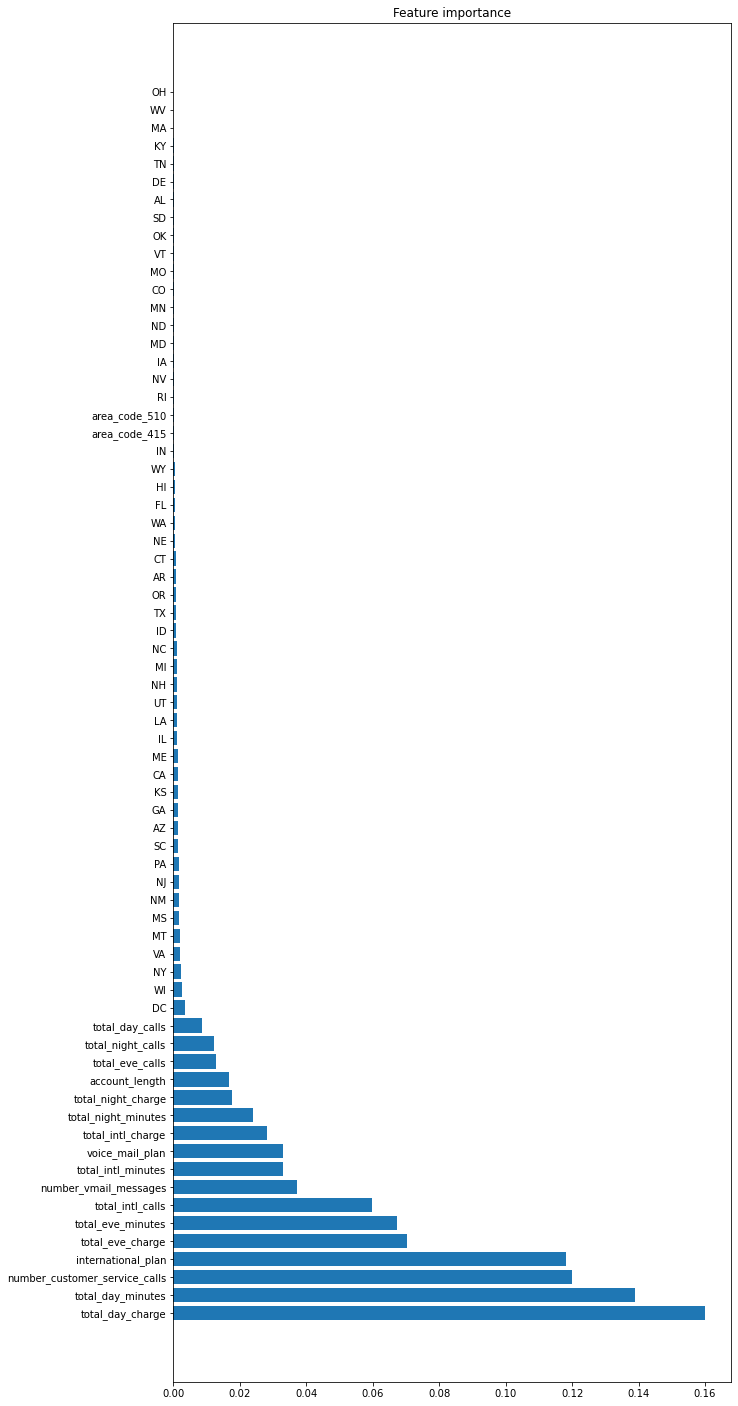

In [27]:
plt.figure(figsize=(10,25))
afx.plot_importance(gradient_grid_cv.best_estimator_, X.columns)

- Los atributos que aumentan la Probabilidad de fuga de los clientes, ordenados de mayor a menor importantancia, son:
    * total_day_charge.
    * total_day_minutes.
    * number_costumer_service_calls
    * international_plan

### Ejercicio 4: Probabilidad de fuga

In [28]:
df_test = pd.read_csv('churn_test.csv').drop('Unnamed: 0', axis=1)

In [29]:
df_test

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,HI,101,area_code_510,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,MT,137,area_code_510,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,OH,103,area_code_408,no,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,NM,99,area_code_415,no,no,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,SC,108,area_code_415,no,no,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no
1663,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,yes
1664,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,no
1665,DC,109,area_code_510,no,no,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,no


#### Se recodificara el data set, para su posterior uso

In [30]:
def preprocesing_data(data): 
    for columns in data.columns:
        if data[columns].dtype == 'object':
            if (data[columns][0]=='no') | (data[columns][0]=='yes'):
                data[columns]=np.where(data[columns]=='yes', 1,0)
            else:
                s1=pd.get_dummies(data[columns], drop_first=True)
                data=pd.concat([data,s1], axis=1)
                data=data.drop(columns, axis=1)
    return data

In [31]:
df_test=preprocesing_data(df_test)

In [32]:
df_test.sample()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,TX,UT,VA,VT,WA,WI,WV,WY,area_code_415,area_code_510
148,157,0,0,0,102.9,94,17.49,229.1,96,19.47,...,0,0,0,0,0,0,0,0,0,1


In [33]:
modelo_final = gradient_grid_cv.best_estimator_

In [34]:
modelo_final.predict(df_test.drop('churn', axis=1))

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
modelo_final.predict_proba(df_test.drop('churn', axis=1))

array([[9.99999456e-01, 5.44492981e-07],
       [9.99694682e-01, 3.05318456e-04],
       [9.74602336e-01, 2.53976643e-02],
       ...,
       [9.99842545e-01, 1.57454824e-04],
       [9.99966047e-01, 3.39527071e-05],
       [9.99971377e-01, 2.86233125e-05]])

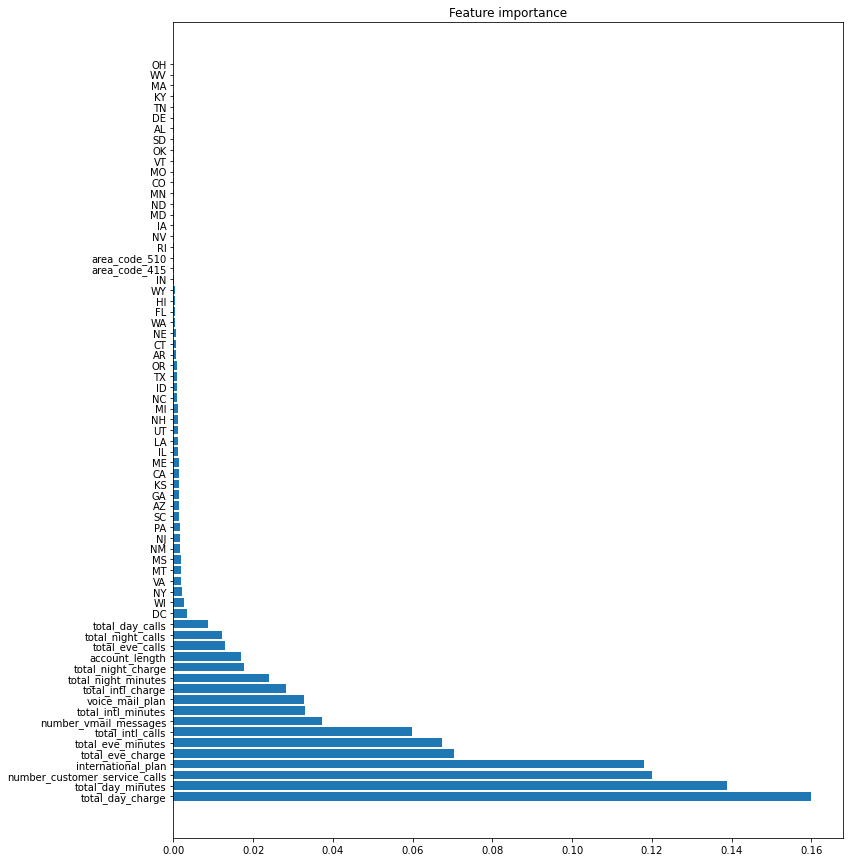

In [36]:
plt.figure(figsize=(12,15))
afx.plot_importance(gradient_grid_cv.best_estimator_, df_test.drop('churn', axis=1).columns)

- Los 3 estados con mayor probabilidad de Fuga son:
    * MS
    * WI
    * DC